# Merging Data avec Pandas 

Dans la science de données on a souvent besoin de fusionner des tableaux. On peut le faire avec la fonction `merge()` qui prend comme paramètres deux `DataFrames` ainsi que les colonnes avec lesquelles réaliser les jointures. Cette méthode est très similaire à SQL sur le principe 🔭


### Importer pandas et les dataset `user_device.csv`, `user_usage.csv` et `android_devices.csv`

In [170]:
import pandas as pd
import seaborn as sns
import numpy as ny
import matplotlib as ml
user_device = pd.read_csv("~/python3/python_h3/user_device.csv")
user_usage = pd.read_csv("~/python3/python_h3/user_usage.csv")
android_devices = pd.read_csv("~/python3/python_h3/android_devices.csv")
sns.set()

### Importer les dataset & renommer la colonne `Branding` en `Manufacturer` du dataset `android_devices.csv`

In [171]:
android_devices.info()
android_devices = android_devices.rename(columns={'Retail Branding': 'Manufacturer'})
android_devices.info()
user_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546 entries, 0 to 14545
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Retail Branding  14542 non-null  object
 1   Marketing Name   13375 non-null  object
 2   Device           14546 non-null  object
 3   Model            14546 non-null  object
dtypes: object(4)
memory usage: 454.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546 entries, 0 to 14545
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Manufacturer    14542 non-null  object
 1   Marketing Name  13375 non-null  object
 2   Device          14546 non-null  object
 3   Model           14546 non-null  object
dtypes: object(4)
memory usage: 454.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------    

### Afficher les dataset 

In [172]:
user_usage.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [173]:
user_device.head(5)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [193]:
android_devices.head(10)

,Manufacturer,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


### Votre premier merge

In [175]:
merge = pd.merge(user_usage, user_device[['use_id','platform','device']], on='use_id')
merge.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


### Afficher la `shape` de vos dataset ainsi que celle du dataset de sortie 

Que remarquez vous ? 

In [176]:
print("user_usage dimensions: ",user_usage.shape)
print("user_device dimensions: ",user_device.shape)
print("result dimensions: ",merge.shape)

user_usage dimensions:  (240, 4)
user_device dimensions:  (272, 6)
result dimensions:  (159, 6)


### Afficher via `value_counts` les `use_id` présent dans le nouveau dataset ainsi que ceux non présent 

In [177]:
user_usage['use_id'].isin(merge['use_id']).value_counts()

True     159
False     81
Name: use_id, dtype: int64

### Le left merge

Afficher la `shape` du dataset `user_usage`, celle du dataset de sortie ainsi que les valeurs manquantes. 

In [178]:
merge_left = pd.merge(user_usage, user_device[['use_id','platform','device']], how='left')
merge_left.shape

(240, 6)

### Afficher votre dataset 

In [179]:
merge_left.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


### Le right merge

Afficher la `shape` du dataset `user_device`, celle du dataset de sortie ainsi que les valeurs manquantes des colonnes `monthly_mb` et `platform`. 

In [180]:
merge_right = pd.merge(user_usage, user_device[['use_id','platform','device']], how='right')
merge_right.shape

(272, 6)

### Le outer merge example

Afficher les valeurs unique de `use_id` des datasets `user_device` & `user_usage`, celle du dataset de sortie ainsi que les valeurs no manquantes. 

<AxesSubplot:>

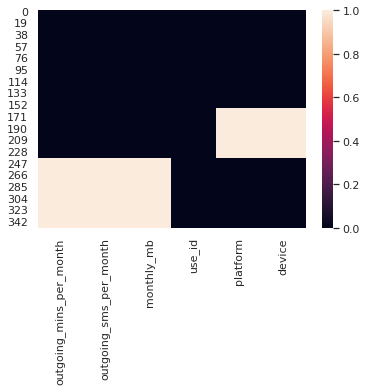

In [195]:
merge_outer = pd.merge(user_usage, user_device[['use_id','platform','device']], how='outer')
merge_outer.isna().sum()
sns.heatmap(merge_outer.isna())

### Afficher les lignes `0,1,200,201,350,351`

In [194]:
merge_outer.iloc[[0,1,200,201,350,351]]

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
200,28.79,29.42,3114.67,23988,NaN,NaN
201,616.56,99.85,5414.14,24006,NaN,NaN
350,NaN,NaN,NaN,23050,ios,"iPhone7,2"
351,NaN,NaN,NaN,23051,ios,"iPhone7,2"


### Ajouter les colonnes `device` & `manufacturer`

In [204]:
result = user_usage.merge(user_device[['use_id', 'platform', 'device']], on="use_id", how="left")
#result.head()
result = result.merge(android_devices[['Device', 'Manufacturer', 'Model']], left_on='device', right_on='Model', how='left')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Device,Manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,jflte,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,herolte,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,herolte,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,coreprimevelte,Samsung,SM-G361F


In [190]:
merge_manufacturer.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14536, 14537, 14538, 14539, 14540, 14541, 14542, 14543, 14544,
            14545],
           dtype='int64', length=14546)

### Afficher les `device` commencant par 'GT'

In [207]:
result["device"].str.startswith("GT")

0       True
1      False
2      False
3      False
4      False
       ...  
287      NaN
288      NaN
289      NaN
290      NaN
291      NaN
Name: device, Length: 292, dtype: object

### Afficher le dataset des résultats 

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


### Grouper vos données par `manufacturer`
Compter les `use_id` et afficher les moyennes des colonnes `outgoing_mins_per_month`, `outgoing_sms_per_month`, `monthly_mb`

,use_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
manufacturer,,,,
HTC,44,299.842955,93.059318,5144.077955
Huawei,3,81.526667,9.500000,1561.226667
LGE,2,111.530000,12.760000,1557.330000
Lava,2,60.650000,261.900000,12458.670000
Lenovo,2,215.920000,12.930000,1557.330000
Motorola,16,95.127500,65.666250,3946.500000
OnePlus,6,354.855000,48.330000,6575.410000
Samsung,108,191.010093,92.390463,4017.318889
Sony,16,177.315625,40.176250,3212.000625
